<a href="https://colab.research.google.com/github/DeveloperAkram/Colab-Notebooks/blob/master/Project_05_Car_Price_Prediction_using_Machine_Learning_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Immporting the Dependenies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection

In [2]:
# loading the data from csvv file to pandas datafram

car_dataset = pd.read_csv('/content/car data.csv')

In [3]:
# first 5 rows of the dataframe

car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
# no of rows and colummns

car_dataset.shape

(301, 9)

In [6]:
# getting some information about dataset

car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# checking the no of missing values

car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# checking the distribution of categorical data

print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the categorical data

In [9]:
# encoding 'Fuel Type' colummn
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

# encoding 'Seller Type' column
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)

# encoding 'Transmission' column
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [10]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data into Training data and Test data

In [11]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [12]:
print(X)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]


In [13]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test data

In [14]:
X_train, X_test, Y_tarin, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

In [15]:
print(X.shape, X_train.shape, Y_tarin.shape)

(301, 7) (270, 7) (270,)


Model Training


1.   Linear Regression




In [16]:
# loading the linear regression model

lin_reg_model = LinearRegression()

In [17]:
lin_reg_model.fit(X_train, Y_tarin)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model Evaluation

In [18]:
# prediction on Training data

tarining_data_pred = lin_reg_model.predict(X_train)

In [19]:
# R squared Error for regression

error_score = metrics.r2_score(Y_tarin, tarining_data_pred)
print('R squared Error: ', error_score)

R squared Error:  0.8799451660493711


Visualize the actual price and predicted price

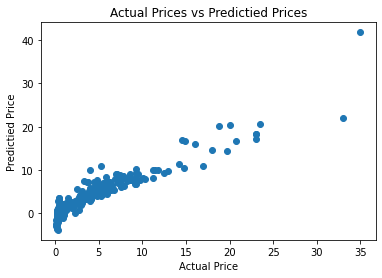

In [20]:
plt.scatter(Y_tarin, tarining_data_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predictied Price')
plt.title('Actual Prices vs Predictied Prices')
plt.show()

In [21]:
# prediction on Test data

test_data_pred = lin_reg_model.predict(X_test)

In [22]:
# R squared Error for regression

error_score = metrics.r2_score(Y_test, test_data_pred)
print('R squared Error: ', error_score)

R squared Error:  0.8365766715027051


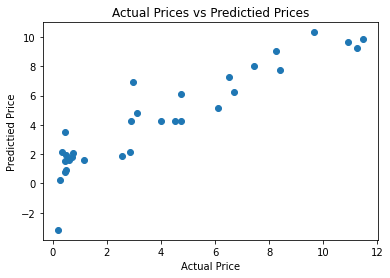

In [23]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predictied Price')
plt.title('Actual Prices vs Predictied Prices')
plt.show()

2. Lasso Regression

In [24]:
# loading the lasso regression model

lasso_reg_model = Lasso()

In [25]:
lasso_reg_model.fit(X_train, Y_tarin)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Model Evaluation

In [26]:
# prediction on Training data

tarining_data_pred = lasso_reg_model.predict(X_train)

In [27]:
# R squared Error for regression

error_score = metrics.r2_score(Y_tarin, tarining_data_pred)
print('R squared Error: ', error_score)

R squared Error:  0.8427856123435794


Visualize the actual price and predicted price

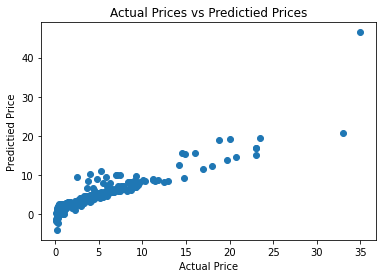

In [28]:
plt.scatter(Y_tarin, tarining_data_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predictied Price')
plt.title('Actual Prices vs Predictied Prices')
plt.show()

In [29]:
# prediction on Test data

test_data_pred = lasso_reg_model.predict(X_test)

In [30]:
# R squared Error for regression

error_score = metrics.r2_score(Y_test, test_data_pred)
print('R squared Error: ', error_score)

R squared Error:  0.8709167941173195


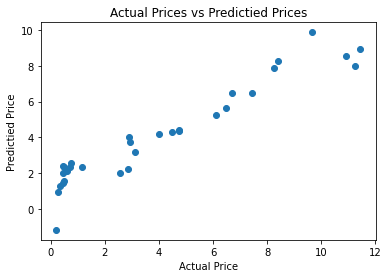

In [31]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predictied Price')
plt.title('Actual Prices vs Predictied Prices')
plt.show()